# Statistics

## Normality Tests

The normal distibution can be considered the most important distribution in finance and one of the mojor statistical building blocks of financial theory. The following conerstones of financial theory rest to a large extent on the assumption that returns of a financial instrument are normally distributed.

<b>Portfolio theory</b>

When stock returns are normally distributed, optimal portfolio choice  can be cast into a setting where only the (expected) mean return and the variance of the returns (or the volatility) as well as the covariances between different stocks are relevant for an investment decision.

<b>Capital asset pricing model</b>

When stock returns are normally distributed, prices of single stocks can be elegantly expressed in linear relationship to a broad market index; the relationship is generally expressed by a measure for the co-movement of a single stock with the market index called beta or $\beta$.

<b>Efficient markets hypothesis</b>

An efficient market is a market where prices reflect all available information. If this hypothesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

<b>Option pricing theory</b>

Brownian motion is the benchmark model for the modeling of random movements of financial instruments; the famous Black-Scholes-Merton option pricing formula uses a geometric Brownian motion as the model for a stock's random price fluctuation over time, leading to log-normally distributed prices and normally distributed returns.

### Benchmark Case

The analysis starts with the geometric Brownian motion as one of the canonical stochasitc processes. The following can be said about the characteristics of paths from a geometric Brownian motion $S$:

<b>Normal log returns</b>

Log returns $\log\frac{S_t}{S_s}=\log S_t - \log S_s$ between two times $0<s<t$ are normally distributed

<b>Log-normal values</b>

At any time $t>0$, the values $S_t$ are log-normally distributed.

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt 

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int 
        number of time steps/intervals
    
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    
    '''

    dt = T / M 
    paths = np.zeros((M + 1, I))
    paths[0] = S0 
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()        # Mathcing first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)        # Vectorized Euler discretization of geometric Brownian motion  
    
    return paths

In [3]:
S0 = 100.       # Initial value for simulated processes
r = 0.05        # Constant short rate
sigma = 0.2     # Constant volatility factor
T = 1.0         # Time horizon in year fractions
M = 50          # Number of time invervals
I = 250000    
np.random.seed(1000)

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [5]:
S0 * math.exp(r * T)        # Expected value and average simulated value

105.12710963760242

In [6]:
paths[-1].mean()            # Expected value and average simulated value

105.12645392478755

Text(0, 0.5, 'index level')

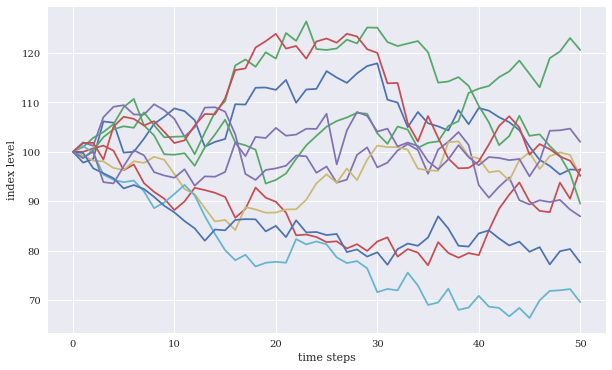

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')

The main interest is in the distribution of the log returns. An `ndarray` object with all the log returns is created based on the simulated paths. Here, a single simulated path and the resulting log returns are shown.

In [8]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [9]:
log_returns = np.log(paths[1:] / paths[:-1])

log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

This is something one might experience in financial markets: days when one makes a positive return on an investment and other days when one is losing money relative to the most recent wealth position.

In [10]:
def print_statistics(array):
    ''' Prints selected statistics
    
    Parameters
    ==========
    array : ndarray
        object to generate statistics on
    '''

    sta = scs.describe(array)
    print('%14s %15s' % ('statistics', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', sta[3]))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [11]:
print_statistics(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.00080
          skew         0.00055
      kurtosis         0.00085


In [12]:
log_returns.mean() * M + 0.5 * sigma ** 2       # Annualized mwan log return after correction for the Ito Lemma

0.05000000000000006

In [13]:
log_returns.std() * math.sqrt(M)                # Annulized volatility; i.e., annulaized standard deviation of log returns

0.20000000000000015

One would expect annulized values of 0.05 for the mean return (after correcting for the Ito term) and 0.2 for the standard deviation (volatility). The annulized values almost match these value perfectly (multiply the mean value by 50 and correct it for the Ito term; multiply the standard deviaion by $\sqrt{50}$)

The frequency distribution of the simulated log returns with the probability density function (PDF) of the normal distribution given the parametizations for `r` and `sigma`.

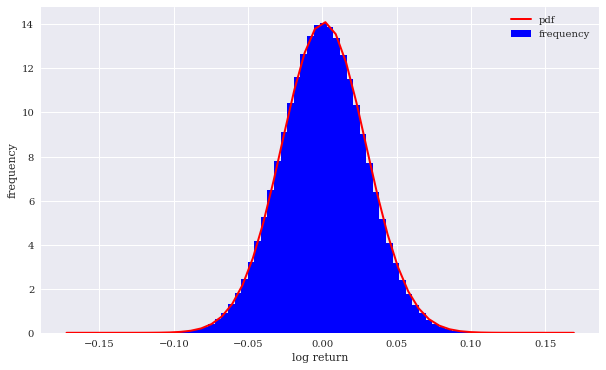

In [14]:
# Histogram of log returns of geometric Brownian motion and normal density function

plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

Comparing a frequency distribution (histogram) with a theoretical PDF (probability density function) is not the only way to graphically "test" for noramlity. So-called quantile-quatile (QQ) plots are also well suited fot this task. For normally distributed sample data sets, such a plot might look like figure below, with the absolute values (dots) lying on a straight line.

Text(0, 0.5, 'sample quantiles')

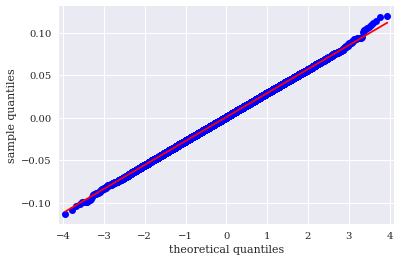

In [15]:
# Quantile-quantile plot for log returns of geometric Brownian motion

sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

The function `normality_tests()` used in the next example combines three different statistical tests.

<b>Skewness test (`skewtest()`)</b>

This tests whether the skew of the sample data is "normal" (i.e., has a value close enough to zero.)
Skewness refers to the degree of asymmetry in a probability distribution. A normal distribution is perfectly symmetrical, so its skewness is zero. Positive skewness means that the tail of the distribution is longer on the positive side, while negative skewness means that the tail is longer on the negative side. A distribution with positive skewness has more observations on the left side of the distribution than the right, and vice versa for negative skewness.


<b> Kurtosis test (`kurtosistest()`)</b>

This test whehter the kurtosis of the sample data is "normal".

Kurtosis, on the other hand, measures the degree of peakedness in a probability distribution. A normal distribution has a kurtosis of 3, which is called mesokurtic. A distribution with a kurtosis less than 3 is called platykurtic, which means it is flatter and has fewer outliers than a normal distribution. A distribution with a kurtosis greater than 3 is called leptokurtic, which means it is more peaked and has more outliers than a normal distribution.

<b> Normality test(`normaltest()`)</b>

This combines the other two test approaches to test for normality.


Normality is a property of a probability distribution where the data is symmetric and bell-shaped, with the mean, median, and mode all being equal. In practice, many statistical methods assume that the data is normally distributed, so normality is an important concept in statistics. However, real-world data often deviates from a normal distribution, and in such cases, alternative statistical methods may be required.


The test values indicate that the log returns of the geometric Brownian motion are indeed normally distributed - i.e., they show $p$-value of 0.05 or above.



In [16]:
def normality_test(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array : ndarray
        object to generate statistics on
    
    '''

    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [17]:
normality_test(log_returns.flatten())       # all p-value are well above 0.05

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


A check whether the end-of-period values are indeed log-normally distributed. This boils down to a normality test, since one only has to transform the data by applying the log function to it to then arrive at normally distributed values. Figure below plots both the log-normally distributed end-of-period values and the transformed ones ("log index level").

Text(0.5, 1.0, 'log data')

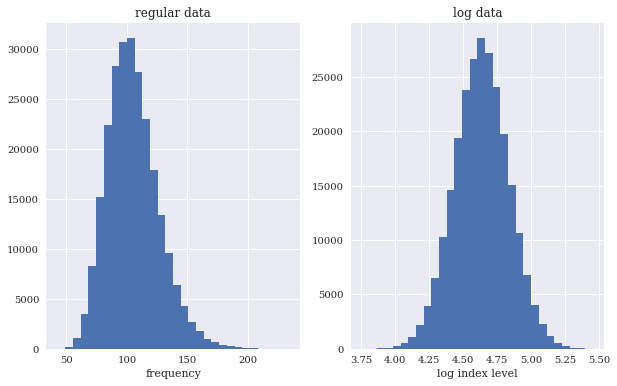

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_xlabel('frequency')
ax1.set_title('regular data')

ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

This statistics for the data set how expected behavior - for example, a mean value close to 105. The long index level values have skew and kurtosis values close to zero and they show high $p$-values, providing stong support for the normal distribution hypothesis.

In [19]:
print_statistics(paths[-1])

    statistics           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std       450.78672
          skew         0.61116
      kurtosis         0.65182


In [20]:
print_statistics(np.log(paths[-1]))

    statistics           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.03999
          skew        -0.00092
      kurtosis        -0.00327


Figure below comapres the frequency distribution with the PDF of the nomral distribution, showing a pretty goof fit.

<b>PDF (probability density funciton)</b>

The probability density function (PDF) of the normal distribution is given by the following equation:
$$f(x)=\left(\frac{1}{\sigma}\sqrt{2\pi}\right)\times e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

where:

- μ is the mean of the distribution.

- σ is the standard deviation of the distribution.

- e is the mathematical constant e (approximately equal to 2.71828).

- π is the mathematical constant pi (approximately equal to 3.14159).

- x is any value on the x-axis.

The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution that is often used to model real-world phenomena such as measurements, errors, and other variables that are influenced by multiple factors. The PDF of the normal distribution is a bell-shaped curve that is symmetric around the mean, with the highest point of the curve located at the mean. The standard deviation determines the spread of the distribution, with smaller values of σ resulting in a narrower and taller curve, and larger values of σ resulting in a flatter and wider curve.



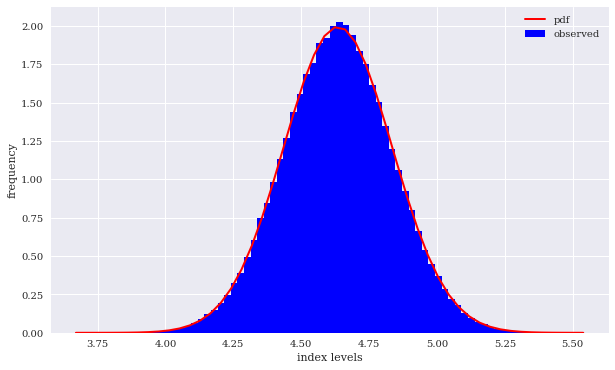

In [21]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantities')

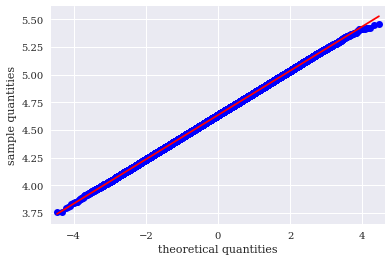

In [22]:
# Figure below also supports the hypothesis that the log index levels are noramlly distributed.å
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantities')
plt.ylabel('sample quantities')

### Real-World Data

We will analyzes four historical financial time series, two for technology stocks and two for exchange traded funcs (ETFs).

- APPL. 0: Apple Inc. stock price
- MSFT. 0: Microsoft Inc. stock price
- SPY : SPDR S&P 500 ETF Trust
- GLD : SPDR Gold Trust